<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Первичный-анализ" data-toc-modified-id="Первичный-анализ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Первичный анализ</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Работа-с-дубликатами" data-toc-modified-id="Работа-с-дубликатами-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Работа с дубликатами</a></span></li><li><span><a href="#Анализ-переменных" data-toc-modified-id="Анализ-переменных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Анализ переменных</a></span><ul class="toc-item"><li><span><a href="#Количественные" data-toc-modified-id="Количественные-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Количественные</a></span></li><li><span><a href="#Категориальные" data-toc-modified-id="Категориальные-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Категориальные</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Предобработка-датасета" data-toc-modified-id="Предобработка-датасета-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка датасета</a></span></li><li><span><a href="#Поиск-наилучшей-модели" data-toc-modified-id="Поиск-наилучшей-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск наилучшей модели</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Отработка-дисбаланса" data-toc-modified-id="Отработка-дисбаланса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Отработка дисбаланса</a></span></li><li><span><a href="#Подбор-модели" data-toc-modified-id="Подбор-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подбор модели</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Первичный анализ

In [848]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [849]:
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [850]:
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Вывод**   
1. Датасет содержит 10,000 наблюдений и 14 переменных, из которых:
- 1 переменная отвечает за порядковый номер.
- 2 переменных отвечают за id клиентов (CustomerId, Surname)
- 6 переменных являются категориальными (Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember, Exited).
- 5 переменных являются количественными (CreditScore, Age, Tenure, Balance, EstimatedSalary).
2. Переменная Tenure содержит 909 пропусков, что составляет 9% от общей выборки.
3. Все типы переменных соответствуют ожиданиям.

Удалим техническую переменную RowNumber, а также распределим оставшиеся на категориальные и нумерические.

In [851]:
df = df.drop(['RowNumber'], axis=1)
client = ['CustomerId', 'Surname']
categorical = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

### Обработка пропусков

Проанализируем пропуски

In [852]:
display(df.query('Tenure != Tenure').head())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


Проверим корреляцию между переменной Tenure и остальными, чтобы найти потенциальную взаимосвязь и заполнить пропуски при возможности.

In [853]:
df.corr()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.016761,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


**Вывод**   
Можно заметить, что почти все коэффициенты корреляции между переменной Tenure и остальными близки к нулю => мы не можем найти адекватных методов для заполнения пропусков.   
Поскольку данная количественная переменная будет использована в качестве одного из объясняющих факторов, ее использование с пропусками далее невозможно.

In [854]:
df = df.dropna()

### Работа с дубликатами

In [855]:
print(df.duplicated().sum())

0


**Вывод**   
Дубликатов не обнаружено

### Анализ переменных

#### Количественные

Взглянем на распределение числовых значений.

In [856]:
df[numeric].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,100181.214924
std,96.410471,10.555581,2.894723,62329.528576,57624.755647
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,2.000000,0.000000,51227.745000
50%,652.000000,37.000000,5.000000,97318.250000,100240.200000
75%,717.000000,44.000000,7.000000,127561.890000,149567.210000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


**Вывод**   
1. Кредитный скоринг лежит в диапазоне от 350 до 850.
2. Возраст самого молодого клиента 18 лет, самого возрастного - 92 года.
3. Максимальный "стаж" клиента составляет 10 лет => можем предположить, что банк был открыт 10 лет назад.
4. Не менее четверти клиентов банка имеют ноль на счету, средняя сумма ~ 97k
5. Средняя зп находится на уровне ~100k, при этом есть клиенты с подозрительно низкими зп. Взглянем на них подробнее.

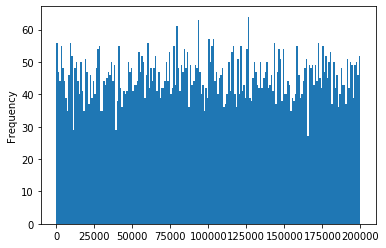

In [857]:
df['EstimatedSalary'].plot(kind='hist', bins=200);

В соответствии с информацией, доступной в интернете, минимальная ЗП в евросоюзе составляет 1,000Е в месяц или 12,000Е в год, пенсия около 500Е в месяц или 6,000Е в год. Посчитаем, сколько клиентов не соответствует минимальной границе.

In [858]:
print('Клиентов с зп меньше 6k:', df['EstimatedSalary'][df['EstimatedSalary'] < 6000].count())

Клиентов с зп меньше 6k: 294


**Вывод**   
Клиентов с "подозрительной" заработной платой чуть меньше 300 или 3% от общей выборки. Для получения более объективных результатов удалим эти наблюдения.

In [859]:
df = df.query('EstimatedSalary >= 6000')

#### Категориальные

In [860]:
for element in categorical:
    print(df[element].value_counts())
    print()

France     4399
Germany    2217
Spain      2181
Name: Geography, dtype: int64

Male      4821
Female    3976
Name: Gender, dtype: int64

1    4471
2    4043
3     228
4      55
Name: NumOfProducts, dtype: int64

1    6211
0    2586
Name: HasCrCard, dtype: int64

1    4541
0    4256
Name: IsActiveMember, dtype: int64

0    7003
1    1794
Name: Exited, dtype: int64



**Вывод**   
1. Сбалансированные классы: Geography, Gender, IsActiveMember.
2. Несбалансированные: NumOfProducts, HasCrCard, Exited.

## Исследование задачи

### Предобработка датасета

Перед разделением выборки приведем категориальные переменные к dummy-переменным.

In [861]:
categorical = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
df = pd.get_dummies(df, columns=categorical, drop_first=True)

Разделим выборку на три:
1. Обучающая - 60%
2. Валидационная - 20%
3. Тестовая - 20%

In [862]:
train, vt = train_test_split(df, test_size=0.4, random_state=12345)
valid, test = train_test_split(vt, test_size=0.5, random_state=12345)

print(train.shape, valid.shape, test.shape)

(5278, 16) (1759, 16) (1760, 16)


In [863]:
target_train = train['Exited']
target_valid = valid['Exited']
target_test = test['Exited']

features_train = train.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
features_valid = valid.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
features_test = test.drop(['Exited', 'CustomerId', 'Surname'], axis=1)

Список факторов также содержит числовые факторы. Поскольку они имеют различные диапазоны значений, их необходимо масштабировать.

In [864]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
display(features_train.head())

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
4784,0.149888,1.342495,0.680914,1.785622,1.497537,0,1,0,0,0,0,1,0
4589,-0.361724,-0.363963,0.680914,-1.220098,0.855344,0,0,1,1,0,0,1,0
4988,-0.455693,0.773675,-0.700943,0.279198,0.619744,0,0,1,1,0,0,0,1
6594,1.016495,0.110053,-0.700943,-1.220098,-0.821278,0,0,0,0,0,0,0,0
6231,-0.194667,0.868479,-1.391871,0.484562,0.853129,1,0,1,0,0,0,1,1


### Поиск наилучшей модели

В рамках задачи классификации оценим 3 модели и найдем лучшие параметры для каждой из них.

In [865]:
#DecisionTreeClassifier
max_score = 0
best_depth = 1
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    target_predicted = model.predict(features_valid)
    if f1_score(target_valid, target_predicted) > max_score:
        best_depth = depth
        max_score = f1_score(target_valid, target_predicted)
print(f'Лучшая глубина - {best_depth}, f1_score: {max_score:.2f}')

Лучшая глубина - 9, f1_score: 0.58


In [866]:
#RandomForestClassifier
max_score = 0
best_depth = 1
best_estimator = 1
for depth in range(1, 10):
    for estimator in range(1, 20):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator)
        model.fit(features_train, target_train)
        target_predicted = model.predict(features_valid)
        if f1_score(target_valid, target_predicted) > max_score:
            best_depth = depth
            best_estimator = estimator
            max_score = f1_score(target_valid, target_predicted)
print(f'Лучшая глубина - {best_depth}, число деревьев - {best_estimator}, f1_score: {max_score:.2f}')

Лучшая глубина - 9, число деревьев - 17, f1_score: 0.61


In [867]:
#LogisticRegression
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
target_predicted = model.predict(features_valid)
print(f'LogisticRegression, f1_score: {f1_score(target_valid, target_predicted):.2f}')

LogisticRegression, f1_score: 0.54


Наилучший скоринг показал модель случайного леса с глубиной - 9 и числом деревьев - 17. Проверим модель на адекватность.

In [868]:
#Проверка адекватности лучшей модели
model = RandomForestClassifier(random_state=12345, max_depth=best_depth, n_estimators=best_estimator)
model.fit(features_train, target_train)
target_predicted = pd.Series([1]*len(target_valid))
print(f'ConstantModel, f1_score: {f1_score(target_valid, target_predicted):.2f}')

ConstantModel, f1_score: 0.34


**Вывод**   
Наилучшая модель - случайный лес с глубиной 9 и числом деревьев 17. Разница в f1_score с константной моделью значительна => модель адекватна.

## Борьба с дисбалансом

### Отработка дисбаланса

In [869]:
target_train.value_counts()

0    4201
1    1077
Name: Exited, dtype: int64

Для отработки данного дисбаланса увеличим выборку с параметром Exited, равным 1.

In [870]:
target_train_zeros = target_train[target_train == 0]
target_train_ones = target_train[target_train == 1]
features_train_zeros = features_train[target_train == 0]
features_train_ones = features_train[target_train == 1]
repeat = 4

#upsampling
target_train_balanced_up = pd.concat([target_train_zeros] + [target_train_ones] * repeat)
features_train_balanced_up = pd.concat([features_train_zeros] + [features_train_ones] * repeat)
features_train_balanced_up, target_train_balanced_up = shuffle(features_train_balanced_up, target_train_balanced_up, random_state=12345)

#downsampling
target_train_balanced_down = pd.concat([target_train_zeros.sample(frac=0.25, random_state=12345)] + [target_train_ones])
features_train_balanced_down = pd.concat([features_train_zeros.sample(frac=0.25, random_state=12345)] + [features_train_ones])
features_train_balanced_down, target_train_balanced_down = shuffle(features_train_balanced_down, target_train_balanced_down, random_state=12345)

target_train_balanced_up.value_counts()
target_train_balanced_down.value_counts()

1    1077
0    1050
Name: Exited, dtype: int64

**Вывод**   
Целевая переменная сбалансирована двумя разными методами. Подберем оптимальную модель для каждого из набора данных.

### Подбор модели

In [871]:
#DecisionTreeClassifier - upsampled
max_score_up = 0
best_depth_up = 1
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_balanced_up, target_train_balanced_up)
    target_predicted = model.predict(features_valid)
    if f1_score(target_valid, target_predicted) > max_score_up:
        best_depth_up = depth
        max_score_up = f1_score(target_valid, target_predicted)
print(f'Лучшая глубина для upsampled - {best_depth_up}, f1_score: {max_score_up:.2f}')

print()

#DecisionTreeClassifier - downsampled
max_score_down = 0
best_depth_down = 1
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_balanced_down, target_train_balanced_down)
    target_predicted = model.predict(features_valid)
    if f1_score(target_valid, target_predicted) > max_score_down:
        best_depth_down = depth
        max_score_down = f1_score(target_valid, target_predicted)
print(f'Лучшая глубина для downsampled - {best_depth_down}, f1_score: {max_score_down:.2f}')

Лучшая глубина для upsampled - 4, f1_score: 0.57

Лучшая глубина для downsampled - 3, f1_score: 0.57


In [872]:
#RandomForestClassifier - upsampled
max_score_up = 0
best_depth_up = 1
best_estimator_up = 1
for depth in range(1, 10):
    for estimator in range(1, 20):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator)
        model.fit(features_train_balanced_up, target_train_balanced_up)
        target_predicted = model.predict(features_valid)
        if f1_score(target_valid, target_predicted) > max_score_up:
            best_depth_up = depth
            best_estimator_up = estimator
            max_score_up = f1_score(target_valid, target_predicted)
print(f'Лучшая глубина для upsampled- {best_depth_up}, число деревьев - {best_estimator_up}, f1_score: {max_score_up:.2f}')

print()

#RandomForestClassifier - downsampled
max_score_down = 0
best_depth_down = 1
best_estimator_down = 1
for depth in range(1, 10):
    for estimator in range(1, 20):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=estimator)
        model.fit(features_train_balanced_down, target_train_balanced_down)
        target_predicted = model.predict(features_valid)
        if f1_score(target_valid, target_predicted) > max_score_down:
            best_depth_down = depth
            best_estimator_down = estimator
            max_score_down = f1_score(target_valid, target_predicted)
print(f'Лучшая глубина для downsampled- {best_depth_down}, число деревьев - {best_estimator_down}, f1_score: {max_score_down:.2f}')

Лучшая глубина для upsampled- 9, число деревьев - 17, f1_score: 0.61

Лучшая глубина для downsampled- 3, число деревьев - 10, f1_score: 0.59


In [873]:
#LogisticRegression weighted
model = LogisticRegression(class_weight='balanced', random_state=12345)
model.fit(features_train, target_train)
target_predicted = model.predict(features_valid)
print(f'LogisticRegression weighted, f1_score: {f1_score(target_valid, target_predicted):.2f}')

LogisticRegression weighted, f1_score: 0.57


In [874]:
#Проверка адекватности лучшей модели
model = RandomForestClassifier(random_state=12345, max_depth=best_depth_up, n_estimators=best_estimator_up)
model.fit(features_train_balanced_up, target_train_balanced_up)
target_predicted = pd.Series([1]*len(target_valid))
print(f'ConstantModel, f1_score: {f1_score(target_valid, target_predicted):.2f}')

ConstantModel, f1_score: 0.34


**Вывод**   
Наилучшая модель - случайный лес с глубиной 9 и числом деревьев 17 для отбалансированной выборки в большую сторону. Разница в f1_score с константной моделью значительна => модель адекватна.

## Тестирование модели

Протестируем модель, полученную на предыдущем шаге.

In [875]:
model = RandomForestClassifier(random_state=12345, max_depth=best_depth_up, n_estimators=best_estimator_up)
model.fit(features_train_balanced_up, target_train_balanced_up)
target_predicted = model.predict(features_test)
print(f'RandomForestClassifier, f1_score: {f1_score(target_test, target_predicted):.2f}')

RandomForestClassifier, f1_score: 0.59


In [876]:
probabilities = model.predict_proba(features_test)
probabilities_one = probabilities[:,1]

auc_roc = roc_auc_score(target_test, probabilities_one)
print(f'auc_roc score равен {auc_roc:.2f}')

auc_roc score равен 0.83


**Вывод**   
F1_score для модели на тестовых данных оказался выше 0.59 => данная модель приемлема для исследования, что подтверждается и высоким значением roc_auc.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*